In [4]:
#ipl match data analysis
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
os.chdir("F:\\ipl\\raghu543-ipl-data-till-2017\\data")

In [6]:
ball_details=pd.read_csv("F:\\ipl\\raghu543-ipl-data-till-2017\\data\\ball_by_ball.csv")
match=pd.read_csv("F:\\ipl\\raghu543-ipl-data-till-2017\\data\\match.csv")
player=pd.read_csv("F:\\ipl\\raghu543-ipl-data-till-2017\\data\\player.csv")
team=pd.read_csv("F:\\ipl\\raghu543-ipl-data-till-2017\\data\\team.csv")

In [57]:
ball_details.head()

,match_id,over_id,ball_id,innings_no,team_batting,team_bowling,striker_batting_position,extra_type,runs_scored,extra_runs,...,fielder_match_sk,fielder_sk,bowler_match_sk,bowler_sk,playerout_match_sk,battingteam_sk,bowlingteam_sk,keeper_catch,player_out_sk,matchdatesk
0,598028,15,6,1,5,2,6.0,No Extras,4,0,...,-1,-1,20343,82,-1,4,1,False,0,4/20/2013
1,598028,14,1,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,False,0,4/20/2013
2,598028,14,2,1,5,2,3.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,False,0,4/20/2013
3,598028,14,3,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,False,0,4/20/2013
4,598028,14,4,1,5,2,3.0,No Extras,0,0,...,-1,-1,20348,345,-1,4,1,False,0,4/20/2013


In [7]:
drop_cols=['player_out_sk','bowlingteam_sk','battingteam_sk','playerout_match_sk','bowler_sk','bowler_match_sk','fielder_sk','fielder_match_sk','striker_batting_position','strikersk','striker_match_sk','nonstriker_sk','nonstriker_match_sk','player_out','fielders','matchdatesk']
ball=ball_details.drop(drop_cols,axis=1)


In [8]:
ball.shape

(150451, 32)

In [9]:
ball.columns

Index(['match_id', 'over_id', 'ball_id', 'innings_no', 'team_batting',
       'team_bowling', 'extra_type', 'runs_scored', 'extra_runs', 'wides',
       'legbyes', 'byes', 'noballs', 'penalty', 'bowler_extras', 'out_type',
       'caught', 'bowled', 'run_out', 'lbw', 'retired_hurt', 'stumped',
       'caught_and_bowled', 'hit_wicket', 'obstructingfeild', 'bowler_wicket',
       'match_date', 'season', 'striker', 'non_striker', 'bowler',
       'keeper_catch'],
      dtype='object')

In [10]:
#ball.dtypes

In [11]:
#removing duplicates
ball=ball.drop_duplicates(keep='first')

In [12]:
ball.describe()

,match_id,over_id,ball_id,innings_no,runs_scored,extra_runs,wides,legbyes,byes,noballs,penalty,bowler_extras,season,striker,non_striker,bowler
count,1.504510e+05,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000
mean,6.362075e+05,10.142704,3.616639,1.482190,1.222199,0.068993,0.037501,0.022233,0.004885,0.004340,0.000033,0.041841,2012.482855,136.537039,135.623419,194.087098
std,2.343623e+05,5.674255,1.807638,0.501768,1.594311,0.349256,0.257405,0.200110,0.114238,0.072654,0.012891,0.266853,2.762877,120.534240,120.070411,132.998950
min,3.359870e+05,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000,1.000000
25%,4.191540e+05,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,40.000000,40.000000,77.000000
50%,5.483820e+05,10.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,96.000000,96.000000,174.000000
75%,8.297420e+05,15.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,208.000000,208.000000,310.000000
max,1.082650e+06,20.000000,9.000000,4.000000,6.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,2017.000000,497.000000,497.000000,497.000000


In [13]:
#removing extra spaces from column name
ball.columns=ball.columns.str.replace(' ','')

In [14]:
#function for max and min values of columns
def min_max_value(col):
    top=ball[col].idxmax()
    top_observations=pd.DataFrame(ball.loc[top])
    
    bottom=ball[col].idxmin()
    bottom_observations=pd.DataFrame(ball.loc[bottom])
    
    min_max_observations=pd.concat([top_observations,bottom_observations],axis=1)
    
    return min_max_observations

In [15]:
min_max_value('runs_scored')

,64,4
match_id,598063,598028
over_id,18,14
ball_id,1,4
innings_no,2,1
team_batting,5,5
team_bowling,3,2
extra_type,No Extras,No Extras
runs_scored,6,0
extra_runs,0,0
wides,0,0


In [16]:
min_max_value('wides')

,2001,0
match_id,829744,598028
over_id,7,15
ball_id,2,6
innings_no,1,1
team_batting,6,5
team_bowling,1,2
extra_type,wides,No Extras
runs_scored,0,4
extra_runs,5,0
wides,5,0


In [17]:
min_max_value('noballs')

,942,0
match_id,392201,598028
over_id,17,15
ball_id,2,6
innings_no,2,1
team_batting,8,5
team_bowling,3,2
extra_type,noballs,No Extras
runs_scored,0,4
extra_runs,5,0
wides,0,0


In [18]:
min_max_value('penalty')

,16403,0
match_id,335993,598028
over_id,12,15
ball_id,6,6
innings_no,2,1
team_batting,6,5
team_bowling,8,2
extra_type,penalty,No Extras
runs_scored,0,4
extra_runs,5,0
wides,0,0


(array([6.1151e+04, 5.5495e+04, 0.0000e+00, 9.7050e+03, 0.0000e+00,
        5.0900e+02, 1.7026e+04, 0.0000e+00, 4.5000e+01, 6.5200e+03]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

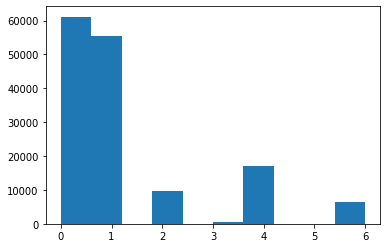

In [19]:
#histogram
num_bins=10
plt.hist(ball['runs_scored'],num_bins)

In [20]:
variables=ball.select_dtypes(include=['float64','int64'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000014C30AE320>,
      dtype=object)

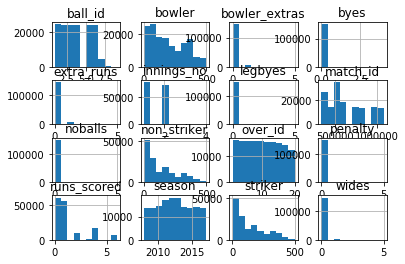

In [21]:
variables.hist(bins=10)

In [22]:
#correlation for numerical variables
ball_corr=variables.corr()['runs_scored'][:-1]

In [23]:
ball_corr

match_id         0.022523
over_id          0.090034
ball_id          0.008990
innings_no      -0.005680
runs_scored      1.000000
extra_runs      -0.141720
wides           -0.111603
legbyes         -0.085048
byes            -0.032783
noballs          0.000281
penalty         -0.001976
bowler_extras   -0.107576
season           0.020468
striker          0.004224
non_striker      0.008940
Name: runs_scored, dtype: float64

In [24]:
ball.isnull().sum()

match_id             0
over_id              0
ball_id              0
innings_no           0
team_batting         0
team_bowling         0
extra_type           0
runs_scored          0
extra_runs           0
wides                0
legbyes              0
byes                 0
noballs              0
penalty              0
bowler_extras        0
out_type             0
caught               0
bowled               0
run_out              0
lbw                  0
retired_hurt         0
stumped              0
caught_and_bowled    0
hit_wicket           0
obstructingfeild     0
bowler_wicket        0
match_date           0
season               0
striker              0
non_striker          0
bowler               0
keeper_catch         0
dtype: int64

In [25]:
#converting date to weekday

ball['match_date'] = pd.to_datetime(ball['match_date'])

ball['match_day'] = ball['match_date'].dt.day_name()

In [26]:
ball.columns

Index(['match_id', 'over_id', 'ball_id', 'innings_no', 'team_batting',
       'team_bowling', 'extra_type', 'runs_scored', 'extra_runs', 'wides',
       'legbyes', 'byes', 'noballs', 'penalty', 'bowler_extras', 'out_type',
       'caught', 'bowled', 'run_out', 'lbw', 'retired_hurt', 'stumped',
       'caught_and_bowled', 'hit_wicket', 'obstructingfeild', 'bowler_wicket',
       'match_date', 'season', 'striker', 'non_striker', 'bowler',
       'keeper_catch', 'match_day'],
      dtype='object')

In [27]:
balls=ball.drop(['match_date'],axis=1)

In [28]:
balls.columns

Index(['match_id', 'over_id', 'ball_id', 'innings_no', 'team_batting',
       'team_bowling', 'extra_type', 'runs_scored', 'extra_runs', 'wides',
       'legbyes', 'byes', 'noballs', 'penalty', 'bowler_extras', 'out_type',
       'caught', 'bowled', 'run_out', 'lbw', 'retired_hurt', 'stumped',
       'caught_and_bowled', 'hit_wicket', 'obstructingfeild', 'bowler_wicket',
       'season', 'striker', 'non_striker', 'bowler', 'keeper_catch',
       'match_day'],
      dtype='object')

In [29]:
#boxplot for categorical values
categories=balls.select_dtypes(include=['object','bool'])
categories

,team_batting,team_bowling,extra_type,out_type,caught,bowled,run_out,lbw,retired_hurt,stumped,caught_and_bowled,hit_wicket,obstructingfeild,bowler_wicket,keeper_catch,match_day
0,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday
1,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday
2,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday
3,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday
4,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday
5,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday
6,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday
7,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday
8,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday
9,5,2,No Extras,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,Saturday


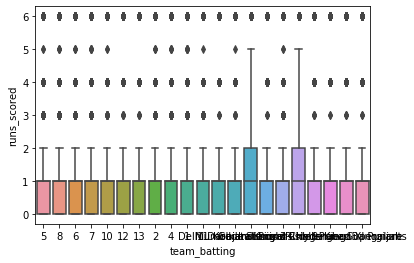

In [30]:
box1=sns.boxplot(x='team_batting',y='runs_scored',data=ball)

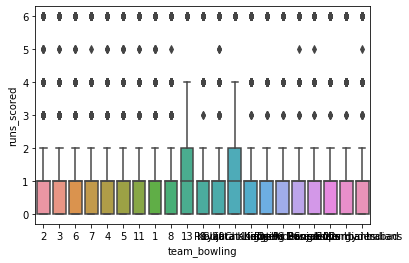

In [31]:
box2=sns.boxplot(x='team_bowling',y='runs_scored',data=ball)

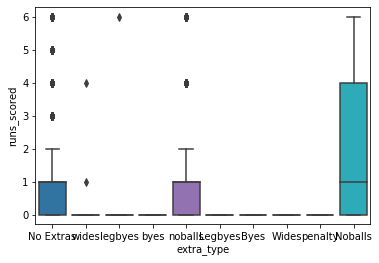

In [32]:
box2=sns.boxplot(x='extra_type',y='runs_scored',data=ball)

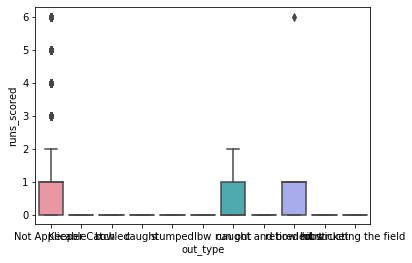

In [33]:
box2=sns.boxplot(x='out_type',y='runs_scored',data=ball)

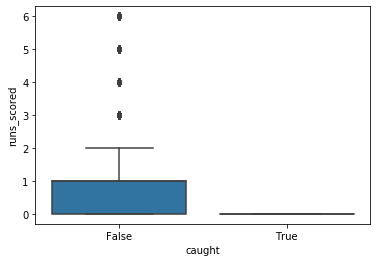

In [34]:
box2=sns.boxplot(x='caught',y='runs_scored',data=ball)

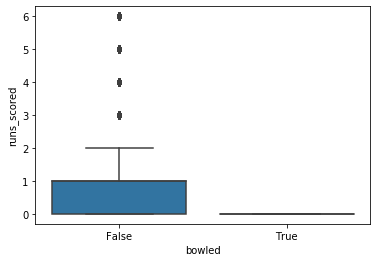

In [35]:
box2=sns.boxplot(x='bowled',y='runs_scored',data=ball)

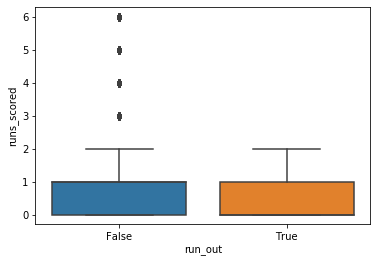

In [36]:
box2=sns.boxplot(x='run_out',y='runs_scored',data=ball)

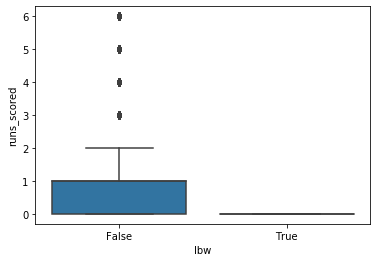

In [37]:
box2=sns.boxplot(x='lbw',y='runs_scored',data=ball)

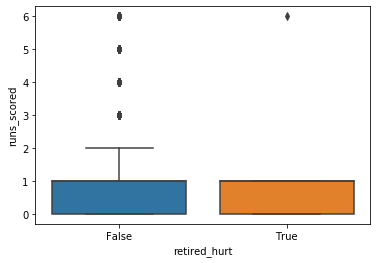

In [38]:
box2=sns.boxplot(x='retired_hurt',y='runs_scored',data=ball)

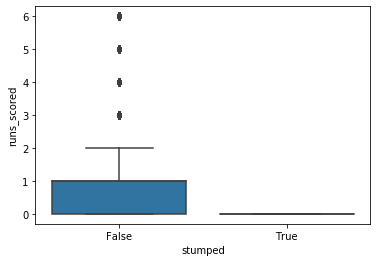

In [39]:
box2=sns.boxplot(x='stumped',y='runs_scored',data=ball)

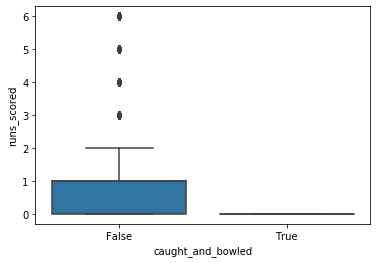

In [40]:
box2=sns.boxplot(x='caught_and_bowled',y='runs_scored',data=ball)

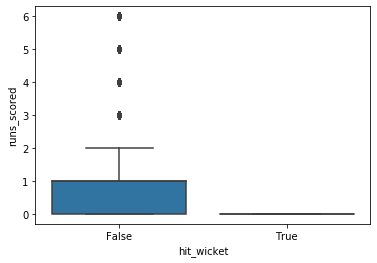

In [41]:
box2=sns.boxplot(x='hit_wicket',y='runs_scored',data=ball)

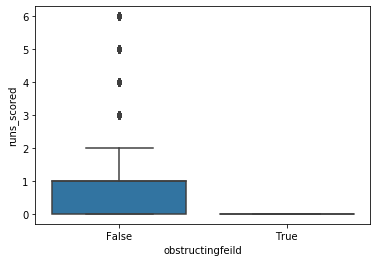

In [42]:
box2=sns.boxplot(x='obstructingfeild',y='runs_scored',data=ball)

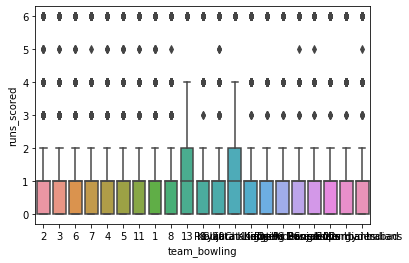

In [43]:
box2=sns.boxplot(x='team_bowling',y='runs_scored',data=ball)

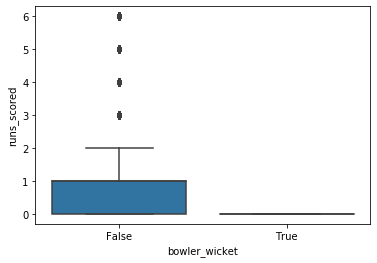

In [44]:
box2=sns.boxplot(x='bowler_wicket',y='runs_scored',data=ball)

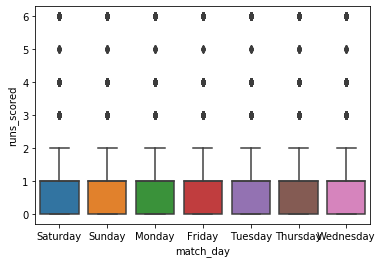

In [45]:
box2=sns.boxplot(x='match_day',y='runs_scored',data=ball)

In [47]:
balls.to_csv("balls.csv")

In [48]:
#match details
match.shape

(637, 17)

In [49]:
match.head()

,match_sk,match_id,team1,team2,match_date,season_year,venue_name,city_name,country_name,toss_winner,match_winner,toss_name,win_type,outcome_type,manofmach,win_margin,country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1


In [50]:
drop=['match_sk','win_type','match_date']
matches=match.drop(drop,axis=1)
matches.shape

(637, 14)

In [51]:
matches.isnull().sum()

match_id        0
team1           0
team2           0
season_year     0
venue_name      1
city_name       0
country_name    0
toss_winner     1
match_winner    3
toss_name       1
outcome_type    0
manofmach       4
win_margin      9
country_id      0
dtype: int64

In [52]:
#deleting rows with na values as they are less in amount
match=matches.dropna()

In [53]:
var=match.select_dtypes(include=['float64','int64'])
var


,match_id,season_year,win_margin,country_id
0,335987,2008,140.0,1
1,335988,2008,33.0,1
2,335989,2008,9.0,1
3,335990,2008,5.0,1
4,335991,2008,5.0,1
5,335992,2008,6.0,1
6,335993,2008,9.0,1
7,335994,2008,6.0,1
8,335995,2008,3.0,1
9,335996,2008,66.0,1


In [54]:
cat=match.select_dtypes(include=['object','bool'])
cat

,team1,team2,venue_name,city_name,country_name,toss_winner,match_winner,toss_name,outcome_type,manofmach
0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,Result,BB McCullum
1,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,Result,MEK Hussey
2,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,Result,MF Maharoof
3,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,Result,MV Boucher
4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,Result,DJ Hussey
5,Rajasthan Royals,Kings XI Punjab,Sawai Mansingh Stadium,Jaipur,India,Kings XI Punjab,Rajasthan Royals,bat,Result,SR Watson
6,Deccan Chargers,Delhi Daredevils,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Deccan Chargers,Delhi Daredevils,bat,Result,V Sehwag
7,Chennai Super Kings,Mumbai Indians,"MA Chidambaram Stadium, Chepauk",Chennai,India,Mumbai Indians,Chennai Super Kings,field,Result,ML Hayden
8,Deccan Chargers,Rajasthan Royals,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Rajasthan Royals,Rajasthan Royals,field,Result,YK Pathan
9,Kings XI Punjab,Mumbai Indians,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Mumbai Indians,Kings XI Punjab,field,Result,KC Sangakkara


In [55]:
#two-way table
grouped = match.groupby(['team1','match_winner'])
grouped.size()

team1                        match_winner               
Chennai Super Kings          Chennai Super Kings            50
                             Deccan Chargers                 3
                             Delhi Daredevils                3
                             Kings XI Punjab                 3
                             Kolkata Knight Riders           2
                             Mumbai Indians                  6
                             Pune Warriors                   1
                             Rajasthan Royals                2
                             Royal Challengers Bangalore     2
                             Sunrisers Hyderabad             1
Deccan Chargers              Chennai Super Kings             2
                             Deccan Chargers                13
                             Delhi Daredevils                5
                             Kings XI Punjab                 5
                             Kolkata Knight Riders           

In [56]:
#two-way table
grouped2 = match.groupby(['team2','match_winner'])
grouped2.size()

team2                        match_winner               
Chennai Super Kings          Chennai Super Kings            29
                             Deccan Chargers                 1
                             Delhi Daredevils                2
                             Kings XI Punjab                 3
                             Kochi Tuskers Kerala            1
                             Kolkata Knight Riders           4
                             Mumbai Indians                  6
                             Pune Warriors                   1
                             Rajasthan Royals                4
                             Royal Challengers Bangalore     5
                             Sunrisers Hyderabad             1
Deccan Chargers              Chennai Super Kings             4
                             Deccan Chargers                16
                             Delhi Daredevils                2
                             Kings XI Punjab                 

In [57]:
grouped3 = match.groupby(['manofmach','match_winner'])
grouped3.size()

manofmach         match_winner               
A Chandila        Rajasthan Royals                1
A Kumble          Deccan Chargers                 1
                  Royal Challengers Bangalore     2
A Mishra          Deccan Chargers                 2
                  Delhi Daredevils                3
                  Sunrisers Hyderabad             4
A Nehra           Chennai Super Kings             3
                  Delhi Daredevils                1
                  Mumbai Indians                  1
                  Sunrisers Hyderabad             1
A Singh           Rajasthan Royals                1
A Symonds         Deccan Chargers                 3
A Zampa           Sunrisers Hyderabad             1
AA Jhunjhunwala   Rajasthan Royals                1
AB Dinda          Rising Pune Supergiants         2
AB de Villiers    Delhi Daredevils                2
                  Royal Challengers Bangalore    13
AC Gilchrist      Deccan Chargers                 4
                  

In [58]:
grouped4 = match.groupby(['venue_name','match_winner'])
grouped4.size()

venue_name                                           match_winner               
Barabati Stadium                                     Deccan Chargers                 3
                                                     Kings XI Punjab                 1
                                                     Kolkata Knight Riders           3
Brabourne Stadium                                    Chennai Super Kings             1
                                                     Mumbai Indians                  6
                                                     Rajasthan Royals                2
                                                     Royal Challengers Bangalore     1
                                                     Sunrisers Hyderabad             1
Buffalo Park                                         Chennai Super Kings             1
                                                     Delhi Daredevils                1
                                                 

In [59]:
grouped5 = match.groupby(['city_name','match_winner'])
grouped5.size()

city_name      match_winner               
Abu Dhabi      Chennai Super Kings             4
               Delhi Daredevils                2
               Kings XI Punjab                 5
               Kolkata Knight Riders           2
               Rajasthan Royals                2
               Royal Challengers Bangalore     2
               Sunrisers Hyderabad             2
Ahmedabad      Delhi Daredevils                1
               Mumbai Indians                  1
               Rajasthan Royals                7
               Royal Challengers Bangalore     1
               Sunrisers Hyderabad             1
Bangalore      Chennai Super Kings             4
               Deccan Chargers                 1
               Delhi Daredevils                3
               Kings XI Punjab                 4
               Kolkata Knight Riders           4
               Mumbai Indians                  6
               Rajasthan Royals                3
               Royal Chall

In [60]:
grouped6 = match.groupby(['toss_winner','match_winner'])
grouped6.size()

toss_winner                  match_winner               
Chennai Super Kings          Chennai Super Kings            42
                             Deccan Chargers                 1
                             Delhi Daredevils                3
                             Kings XI Punjab                 3
                             Kolkata Knight Riders           4
                             Mumbai Indians                  4
                             Pune Warriors                   1
                             Rajasthan Royals                2
                             Royal Challengers Bangalore     4
                             Sunrisers Hyderabad             1
Deccan Chargers              Chennai Super Kings             2
                             Deccan Chargers                19
                             Delhi Daredevils                5
                             Kings XI Punjab                 3
                             Kolkata Knight Riders           

In [72]:
match.to_csv("matches.csv")

In [64]:
player.shape

(497, 7)

In [65]:
player

,player_sk,player_id,player_name,dob,batting_hand,bowling_skill,country_name
0,0,1,SC Ganguly,7/8/1972,Left-hand bat,Right-arm medium,India
1,1,2,BB McCullum,9/27/1981,Right-hand bat,Right-arm medium,New Zealand
2,2,3,RT Ponting,12/19/1974,Right-hand bat,Right-arm medium,Australia
3,3,4,DJ Hussey,7/15/1977,Right-hand bat,Right-arm offbreak,Australia
4,4,5,Mohammad Hafeez,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan
5,5,6,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India
6,6,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India
7,7,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India
8,8,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa
9,9,10,CL White,8/18/1983,Right-hand bat,Legbreak googly,Australia


In [66]:
drops=['player_sk','dob','country_name']
players=player.drop(drops,axis=1)

In [67]:
players.shape

(497, 4)

In [68]:
players.dtypes

player_id         int64
player_name      object
batting_hand     object
bowling_skill    object
dtype: object

In [69]:
players.isnull().sum()

player_id         0
player_name       0
batting_hand      0
bowling_skill    46
dtype: int64

In [70]:
player=players.dropna()

In [71]:
player.to_csv("players.csv")

In [140]:
ball.columns

Index(['match_id', 'over_id', 'ball_id', 'innings_no', 'team_batting',
       'team_bowling', 'extra_type', 'runs_scored', 'extra_runs', 'wides',
       'legbyes', 'byes', 'noballs', 'penalty', 'bowler_extras', 'out_type',
       'caught', 'bowled', 'run_out', 'lbw', 'retired_hurt', 'stumped',
       'caught_and_bowled', 'hit_wicket', 'obstructingfeild', 'bowler_wicket',
       'match_date', 'season', 'striker', 'non_striker', 'bowler',
       'keeper_catch', 'match_day'],
      dtype='object')

In [141]:
match.columns

Index(['match_id', 'team1', 'team2', 'season_year', 'venue_name', 'city_name',
       'country_name', 'toss_winner', 'match_winner', 'toss_name',
       'outcome_type', 'manofmach', 'win_margin', 'country_id'],
      dtype='object')

In [142]:
player.columns

Index(['player_id', 'player_name', 'batting_hand', 'bowling_skill'], dtype='object')

In [74]:
teams=team.drop(['team_sk'],axis=1)

In [75]:
teams.shape

(13, 2)

In [146]:
teams

,team_id,team_name
0,1,Kolkata Knight Riders
1,2,Royal Challengers Bangalore
2,3,Chennai Super Kings
3,4,Kings XI Punjab
4,5,Rajasthan Royals
5,6,Delhi Daredevils
6,7,Mumbai Indians
7,8,Deccan Chargers
8,9,Kochi Tuskers Kerala
9,10,Pune Warriors


In [76]:
teams.to_csv("teams.csv")

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn  #for correlation matrix
import scipy
import sklearn
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir("F:\\ipl\\raghu543-ipl-data-till-2017\\data")

In [32]:
balls=pd.read_csv("balls.csv")
matches=pd.read_csv("matches.csv")

In [33]:
#joining files matches and balls to predict match_winner
data=pd.merge(matches,balls,on='match_id',how='left')

In [34]:
data

,match_id,team1,team2,season_year,venue_name,city_name,country_name,toss_winner,match_winner,toss_name,...,caught_and_bowled,hit_wicket,obstructingfeild,bowler_wicket,season,striker,non_striker,bowler,keeper_catch,match_day
0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,1,2,14,False,Friday
1,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,2,1,14,False,Friday
2,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,2,1,14,False,Friday
3,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,2,1,14,False,Friday
4,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,2,1,14,False,Friday
5,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,2,1,14,False,Friday
6,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,2,1,14,False,Friday
7,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,2,1,15,False,Friday
8,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,2,1,15,False,Friday
9,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,...,False,False,False,False,2008,2,1,15,False,Friday


In [35]:
data.shape

(148565, 45)

In [36]:
data.columns

Index(['match_id', 'team1', 'team2', 'season_year', 'venue_name', 'city_name',
       'country_name', 'toss_winner', 'match_winner', 'toss_name',
       'outcome_type', 'manofmach', 'win_margin', 'country_id', 'over_id',
       'ball_id', 'innings_no', 'team_batting', 'team_bowling', 'extra_type',
       'runs_scored', 'extra_runs', 'wides', 'legbyes', 'byes', 'noballs',
       'penalty', 'bowler_extras', 'out_type', 'caught', 'bowled', 'run_out',
       'lbw', 'retired_hurt', 'stumped', 'caught_and_bowled', 'hit_wicket',
       'obstructingfeild', 'bowler_wicket', 'season', 'striker', 'non_striker',
       'bowler', 'keeper_catch', 'match_day'],
      dtype='object')

In [37]:
#dependent and independent variables
Y=data['match_winner']
X=data.drop('match_winner',axis=1)

print(X.shape)
print(Y.shape)

(148565, 44)
(148565,)


In [38]:
#handling categorical variables
data1=pd.get_dummies(X,drop_first=True)

In [39]:
data1.shape

(148565, 405)

In [30]:
#feature selection-univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [42]:
best_features=SelectKBest(score_func=chi2,k=200)
fit=best_features.fit(data1,Y)

In [50]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(data1.columns)

In [51]:
features=pd.concat([dfcolumns,dfscores],axis=1)

In [52]:
features.to_csv("select_kbest_features.csv")

In [53]:
#using extra trees for calculating feature importance
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(data1,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [54]:
print(model.feature_importances_)

[2.55223311e-02 2.14720653e-02 2.55787209e-02 6.39058422e-03
 2.87498903e-04 9.58977521e-05 9.34875831e-03 1.41458258e-04
 6.69514936e-05 3.80352362e-05 5.68111191e-05 1.83624977e-05
 2.12378261e-05 0.00000000e+00 5.46139300e-05 6.34378071e-05
 3.83484721e-05 3.09939163e-05 2.97334445e-05 0.00000000e+00
 1.48036510e-05 1.98551557e-05 0.00000000e+00 3.78057232e-07
 6.26674780e-05 1.99299117e-02 2.19807160e-03 2.71537310e-03
 1.96043396e-03 5.90574984e-06 2.83436780e-03 9.67272800e-03
 1.35731260e-03 9.27995616e-03 1.68482446e-03 1.31876817e-02
 1.09131992e-02 1.23652123e-03 1.28877923e-02 2.23531977e-03
 9.02591108e-03 9.98463054e-03 5.50593767e-03 8.30171118e-03
 2.30012756e-03 1.45362369e-02 2.58469318e-03 1.46891932e-02
 2.02467459e-02 3.04810496e-03 7.64378500e-03 2.41100800e-03
 1.10245139e-02 1.08305177e-02 2.12143442e-03 2.72329610e-05
 4.56947456e-04 1.63776936e-03 1.25118844e-03 1.98345362e-03
 1.15990118e-02 4.23758749e-03 1.25396039e-03 1.68250385e-03
 8.90897839e-04 8.566219

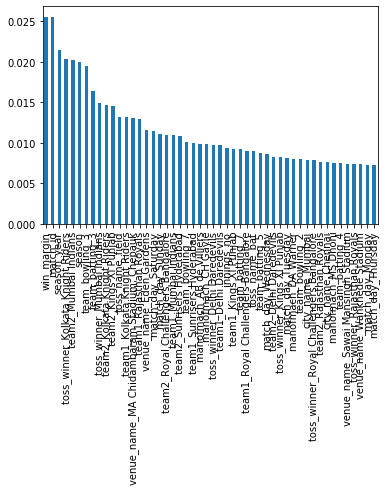

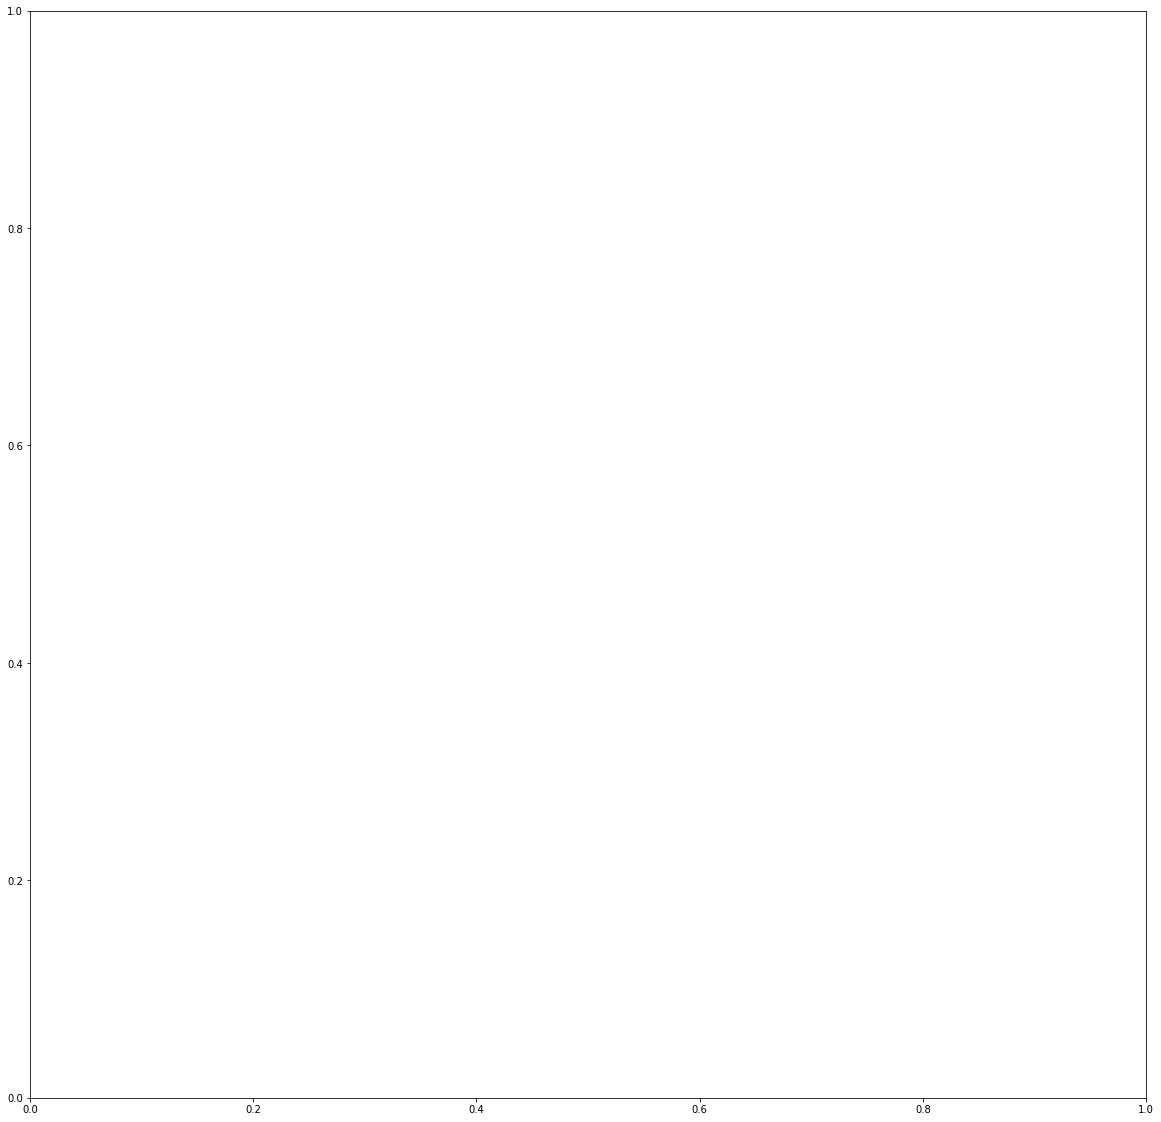

In [72]:
import matplotlib.pyplot as plt
feature_importance=pd.Series(model.feature_importances_,index=data1.columns)
feature_importance.nlargest(50).plot(kind='bar')
f, ax = plt.subplots(figsize=(20,20))
plt.show()

In [61]:
data.columns

Index(['match_id', 'team1', 'team2', 'season_year', 'venue_name', 'city_name',
       'country_name', 'toss_winner', 'match_winner', 'toss_name',
       'outcome_type', 'manofmach', 'win_margin', 'country_id', 'over_id',
       'ball_id', 'innings_no', 'team_batting', 'team_bowling', 'extra_type',
       'runs_scored', 'extra_runs', 'wides', 'legbyes', 'byes', 'noballs',
       'penalty', 'bowler_extras', 'out_type', 'caught', 'bowled', 'run_out',
       'lbw', 'retired_hurt', 'stumped', 'caught_and_bowled', 'hit_wicket',
       'obstructingfeild', 'bowler_wicket', 'season', 'striker', 'non_striker',
       'bowler', 'keeper_catch', 'match_day'],
      dtype='object')

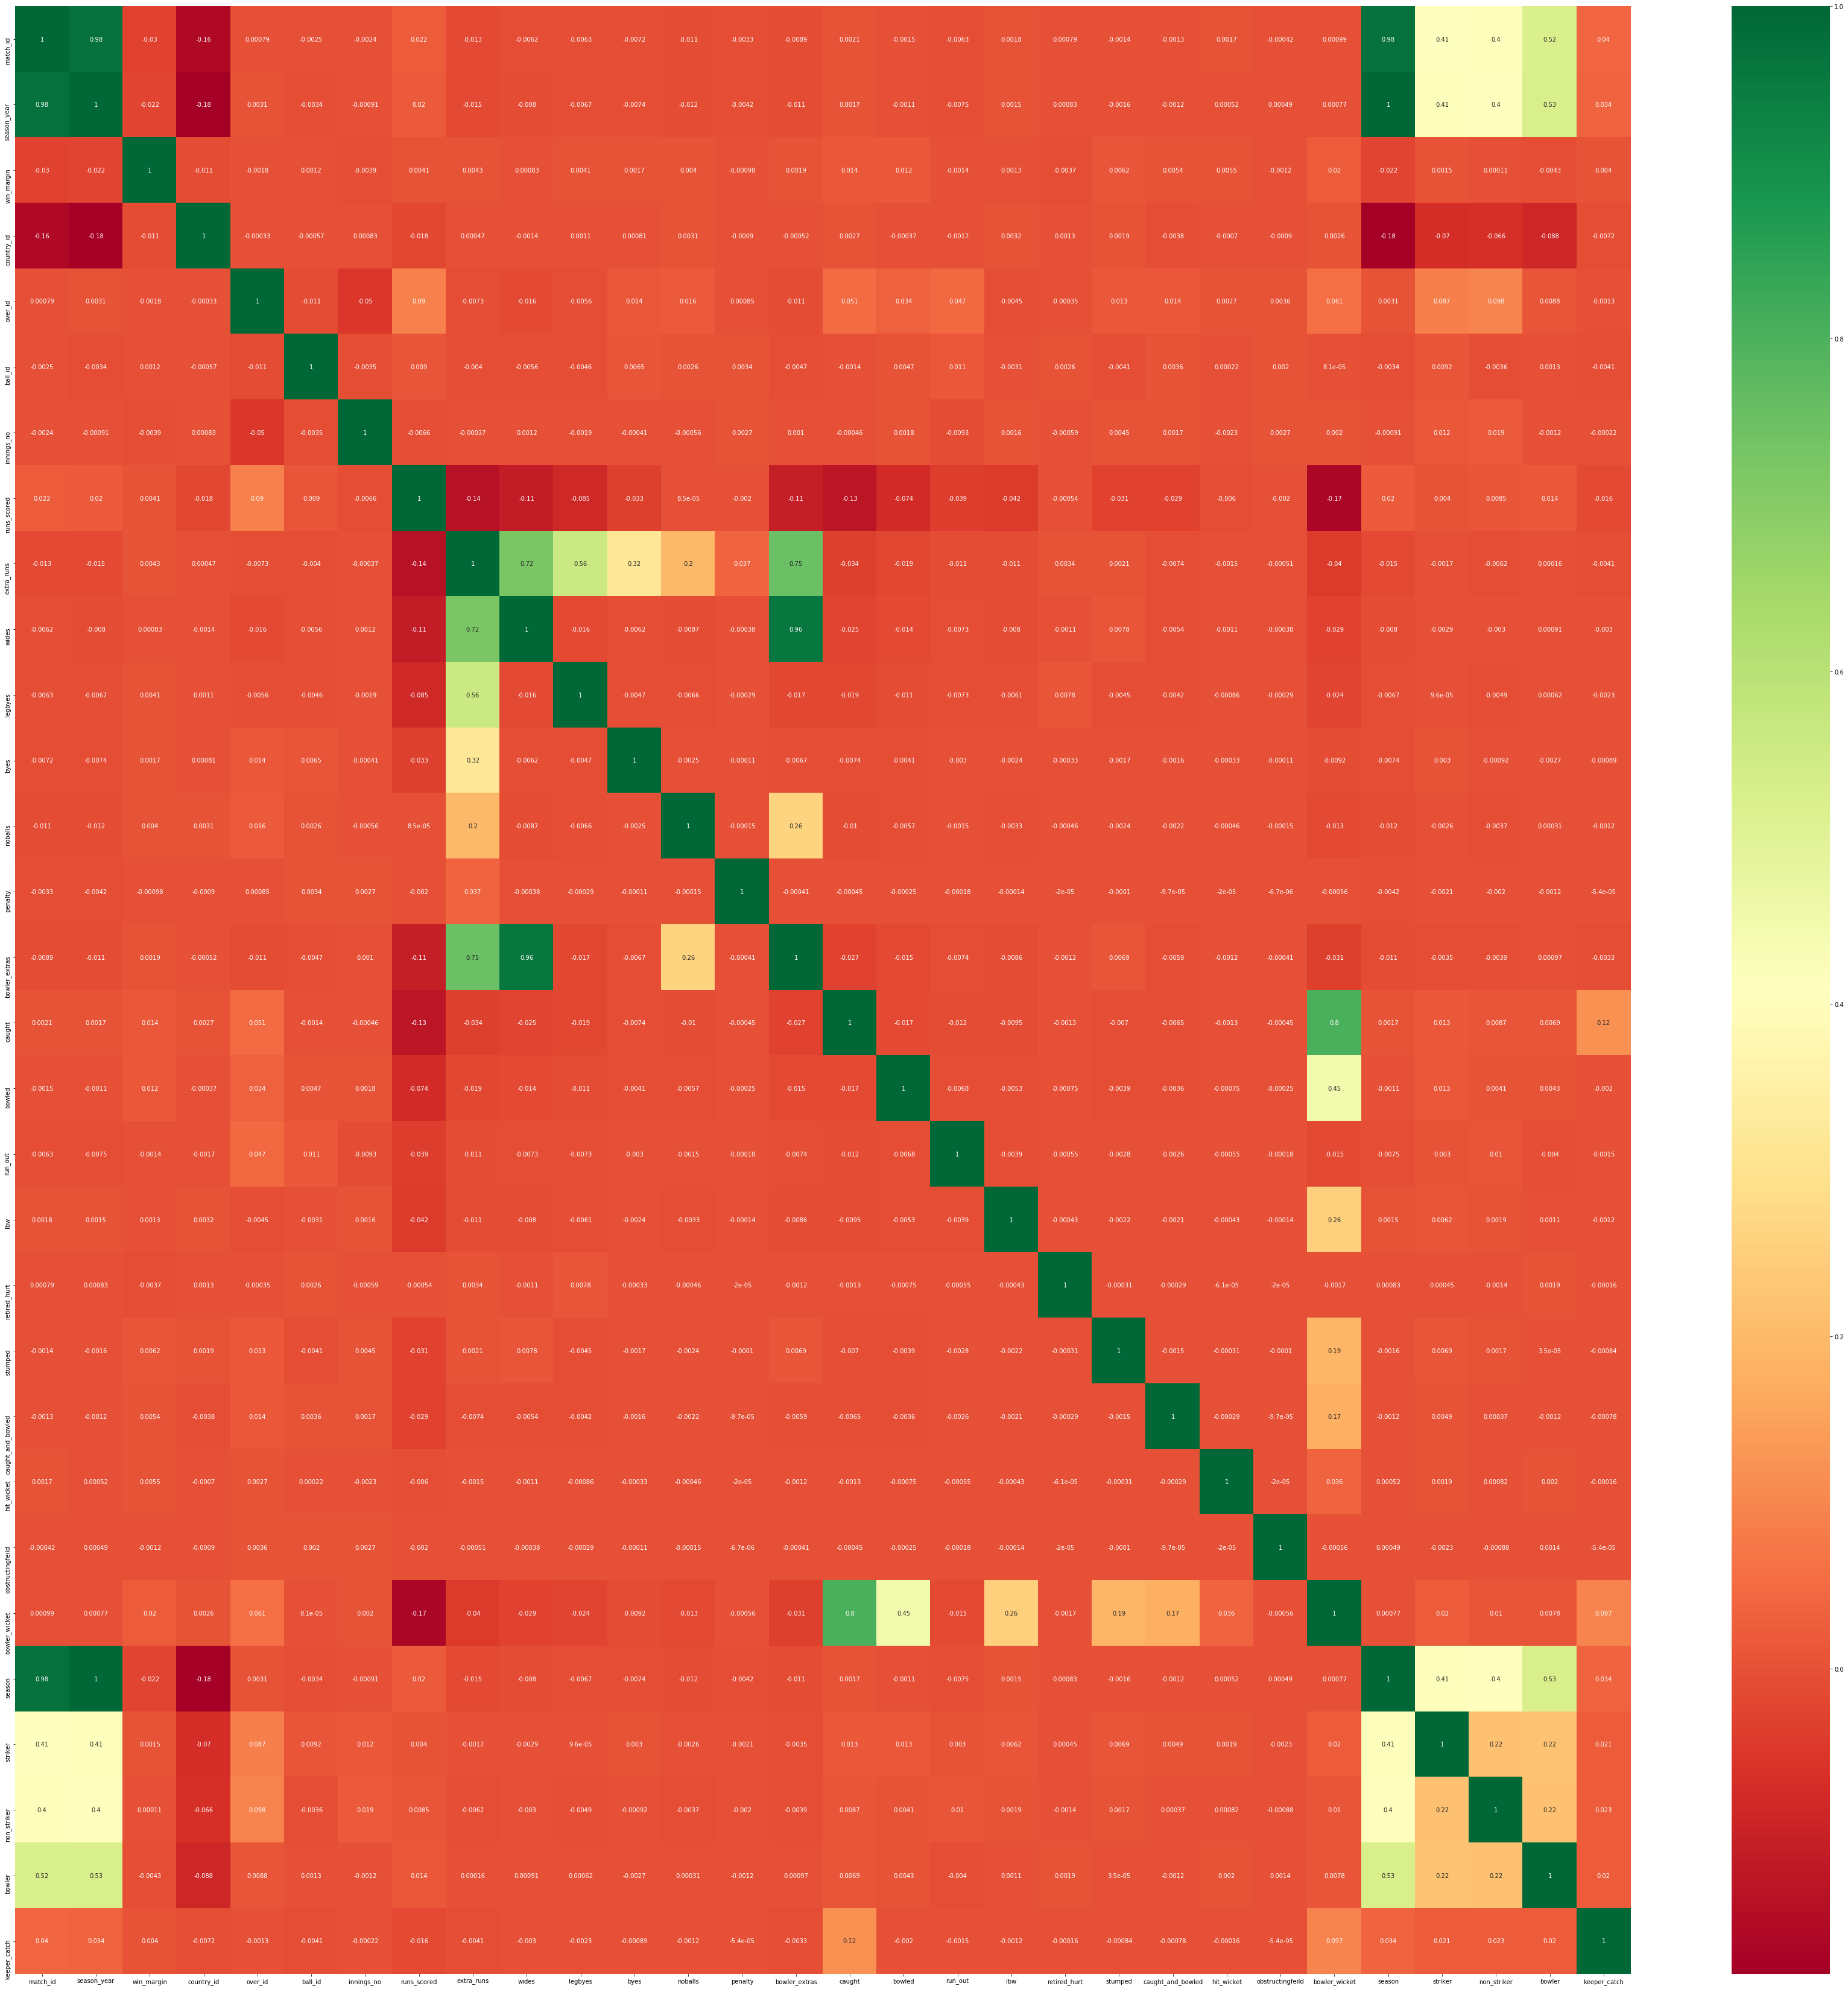

In [68]:
#correlation heatmap
import seaborn as sns
corr=data.corr()
top_corr=corr.index
f, ax = plt.subplots(figsize=(60, 60))
g=sns.heatmap(data[top_corr].corr(),annot=True,cmap="RdYlGn")

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=scaler.fit_transform(data1)


In [74]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [132]:
xtrain,xtest,ytrain,ytest=sklearn.model_selection.train_test_split(data1,Y,test_size=0.20,random_state=122)
xtrain

array([[-0.92402161, -0.89579003,  1.07747888, ..., -0.37067596,
        -0.36913559, -0.3904063 ],
       [ 1.4659019 ,  1.27070418, -0.60468813, ..., -0.37067596,
        -0.36913559, -0.3904063 ],
       [ 0.41534054,  0.54853945, -0.42283224, ..., -0.37067596,
         2.70903169, -0.3904063 ],
       ...,
       [-1.2774569 , -1.61795476, -0.65015211, ..., -0.37067596,
        -0.36913559, -0.3904063 ],
       [-1.27763979, -1.61795476, -0.46829621, ..., -0.37067596,
        -0.36913559, -0.3904063 ],
       [-0.92388125, -0.89579003,  0.94108696, ...,  2.69777412,
        -0.36913559, -0.3904063 ]])

In [135]:
xtest.shape

(29713, 405)

In [107]:
lm=LogisticRegression()

In [108]:
lm.fit(xtrain,ytrain)
#on running this i get bad input error due to multiclass classification problem so decided not to use logistic regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: bad input shape (29712, 405)

In [124]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [125]:
#performing random search
params={"max_depth":[3,None],"min_samples_leaf":[1,9],"criterion":["gini","entropy"]}

In [126]:
tree=DecisionTreeClassifier()
from sklearn.model_selection import RandomizedSearchCV
tree_cv=RandomizedSearchCV(tree,params,cv=10)

In [136]:
tree_cv.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [137]:
print("tuned tree params:{}".format(tree_cv.best_params_))
print("best score is:{}".format(tree_cv.best_score_))

tuned tree params:{'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
best score is:1.0


In [138]:
y_pred=tree_cv.predict(xtest)

In [142]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
cm

array([[3715,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0, 1418,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0, 2987,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,  625,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0, 3237,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,  273,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 3615,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4287,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  566,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 2929,    0,
           0,    

In [140]:
from sklearn.model_selection import cross_val_score
tree=DecisionTreeClassifier()
print(cross_val_score(tree,xtrain,ytrain,cv=10,scoring='accuracy'))

[1. 1. 1. 1. 1.]
